# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Refanda Surya Saputra
- **Email:** refandasuryasaputra@gmail.com
- **ID Dicoding:** refan_surya

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda dari tahun 2011 hingga 2012?
- Apakah jumlah peminjam sepeda bertambah pada hari libur nasional atau akhir pekan dibandingkan dengan hari kerja?
- Bagaimana keadaan cuaca yang lebih disukai oleh pesepeda?
- Apakah musim panas menjadi musim dengan jumlah peminjam sepeda terbanyak?
- Apakah jumlah penyewa sepeda yang terdaftar lebih banyak dari penyewa kasual?
- Apakah sore hari merupakan waktu yang cocok untuk bersepeda?

## Import Semua Packages/Library yang Digunakan

In [183]:
import calendar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [46]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [47]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat 2 dataset yang mencatat jumlah sepeda yang disewa perjam dan perhari dari tahun 2011 hingga 2012. Kemudian, terdapat informasi tambahan yaitu keadaan cuaca dan musim
- Dalam dataset harian tidak terdapat fitur kolom hr (hour), tetapi pada dataset perjam tersedia. Dataset harian mencatat akumulasi dalam satu hari itu.
- Berikut ini adalah ringkasan tiap fitur dalam kedua dataset:
    - instant: index
    - dteday: tanggal
    - season: musim (1: spring, 2: summer, 3: fall, 4: winter)
    - yr: tahun (0: 2911, 1: 2012)
    - mnth: bulan (1 hingga 12)
    - holiday: hari libur atau tidak
    - weekday: hari dalam seminggu
    - workingday: jika bukan weekend atau holiday 1, selain itu 0
    - weathersit: Keadaan cuaca
        - 1: cerah, sedikit awan, dan awan sebagian
        - 2: kabut ringan + mendung, kabut ringan + sebagian besar mendung, kabut ringan + sedikit awan, kabut ringan
        - 3: salju ringan, hujan ringan + badao petir + sebagian cerah, hujan ringan + sebagian cerah
        - 4: hujan lebat + es + badai petir + kabut ringan, bersalju + berkabut
    - temp: suhu dalam celcius yang telah dinormalisasi
    - atemp: suhu yang terasa oleh tubuh dalam celcius dan dinormalisasi
    - hum: kelembaban yang dinormalisasi
    - windspeed: kecepatan angin yang dinormalisasi
    - casual: jumlah pengguna kasual
    - registered: jumlah pengguna yang terdaftar
    - cnt: jumlah penyewa sepeda termasuk kasual dan terdaftar


### Assessing Data

**Menilai Data Penyewaan Harian**

In [48]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [49]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [50]:
print(f"Jumlah duplikasi: {day_df.duplicated().sum()}")

Jumlah duplikasi: 0


In [51]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai Data Penyewaan Sepeda Perjam**

In [52]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [53]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [54]:
print(f"Jumlah duplikasi: {hour_df.duplicated().sum()}")

Jumlah duplikasi: 0


In [55]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berikut ini adalah rangkuman dari penilaian data yang akan digunakan:
| | Tipe Data | Missing Value | Duplicated Data | Inaccurate Value |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| day_df | Terdapat kesalahan tipe data pada kolom dteday | - | - | - |
| hour_df | Terdapat kesalahan tipe data pada kolom dteday | - | - | - |

**Insight:**
- Pada dataset hour_df dan day_df tidak terdapat nilai yang duplikasi
- Pada dataset hour_df dan day_df tidak terdapat missing value
- Pada dataset hour_df dan day_df terdapat kesalahan tipe data pada kolom dteday karena masih object, harusnya date
- Pada dataset hour_df dan day_df semua nilai akurat

### Cleaning Data

**Membersihkan Data Peminjaman Sepeda Harian**

In [56]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [57]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Membersihkan Data Peminjaman Sepeda Perjam**

In [58]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [59]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada data day_df dan hour_df tidak banyak hal yang perlu dibersihkan, hanya mengubah format kolom dteday dari object menjadi datetime
- Dari awal dataset ini cukup siap untuk melatih model, karena tidak terdapat duplikasi data, missing value, data tidak akurat, sudah dinormalisasi, dan untuk data ketagorikal sudah dilakukan encoding seperti pada kolom season dan weathersit

## Exploratory Data Analysis (EDA)

### Explore ...

In [60]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [61]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

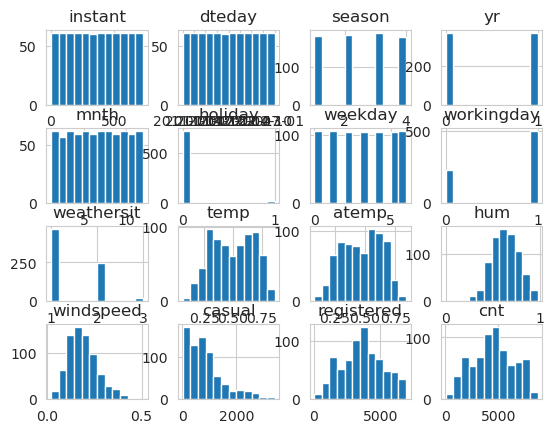

In [62]:
day_df.hist(bins=12)

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

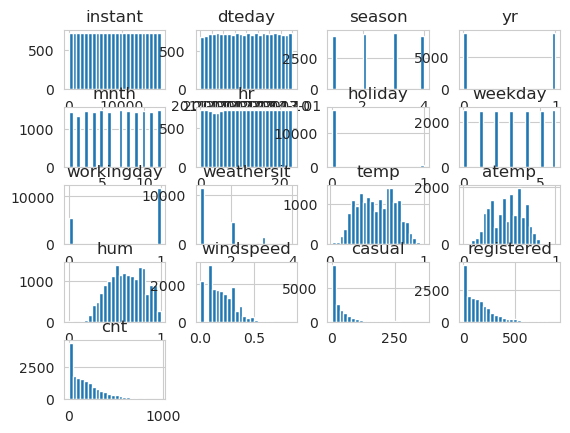

In [63]:
hour_df.hist(bins=24)

In [64]:
day_columns = day_df.drop(columns=["dteday"]).columns


def calculate_skew(data, columns):
    for col in columns:
        temp_series = pd.Series(np.array(data[col]))
        print(f"{col}: {temp_series.skew()}")


calculate_skew(day_df, day_columns)

instant: 0.0
season: -0.00038427801888861327
yr: -0.002741609619878603
mnth: -0.00814865012726082
holiday: 5.6542237490401535
weekday: 0.002741597663150328
workingday: -0.7931473510380634
weathersit: 0.9573852755868604
temp: -0.054520964760408276
atemp: -0.13108804205446
hum: -0.06978343399095213
windspeed: 0.6773454211095378
casual: 1.2664540319434734
registered: 0.04365877988903687
cnt: -0.04735278011900183


In [65]:
hour_columns = hour_df.drop(columns=["dteday"]).columns

calculate_skew(hour_df, hour_columns)

instant: 0.0
season: -0.005415699379117384
yr: -0.010243264826335554
mnth: -0.009253248382682946
hr: -0.010679909518954155
holiday: 5.6385379928840065
weekday: -0.0029982213760478935
workingday: -0.7852579601190001
weathersit: 1.2280467231680767
temp: -0.00602088334827027
atemp: -0.09042885855903955
hum: -0.11128714936537845
windspeed: 0.5749052034923136
casual: 2.499236891330847
registered: 1.5579042256481028
cnt: 1.2774116037490577


In [66]:
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [67]:
hour_df.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


In [68]:
day_df.groupby(by="season").agg({
    "cnt": "sum"
})

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [69]:
day_df.groupby(by=["yr", "season"])["cnt"].sum()

yr  season
0   1         150000
    2         347316
    3         419650
    4         326137
1   1         321348
    2         571273
    3         641479
    4         515476
Name: cnt, dtype: int64

In [70]:
day_df.groupby(by=["yr", "mnth"])["cnt"].sum()

yr  mnth
0   1        38189
    2        48215
    3        64045
    4        94870
    5       135821
    6       143512
    7       141341
    8       136691
    9       127418
    10      123511
    11      102167
    12       87323
1   1        96744
    2       103137
    3       164875
    4       174224
    5       195865
    6       202830
    7       203607
    8       214503
    9       218573
    10      198841
    11      152664
    12      123713
Name: cnt, dtype: int64

In [71]:
workday_df = day_df.groupby(by="workingday")["cnt"].sum()
print(workday_df)

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


In [72]:
holiday_df = day_df.groupby(by="holiday")["cnt"].sum()
print(holiday_df)

holiday
0    3214244
1      78435
Name: cnt, dtype: int64


In [73]:
weekend_count = workday_df[0] - holiday_df[1]
print(f"Total penyewa sepeda di weekend: {weekend_count}")

Total penyewa sepeda di weekend: 921834


In [74]:
day_df.groupby(by="weathersit")["cnt"].sum()

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

In [75]:
hour_df.groupby(by="weathersit")["cnt"].sum()

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

In [76]:
day_df.groupby(by="yr")["casual"].sum()

yr
0    247252
1    372765
Name: casual, dtype: int64

In [77]:
day_df.groupby(by="yr")["registered"].sum()

yr
0     995851
1    1676811
Name: registered, dtype: int64

In [78]:
casual_count = day_df["casual"].sum()
print(f"Jumlah penyewa sepeda casual: {casual_count}")

Jumlah penyewa sepeda casual: 620017


In [79]:
registered_count = day_df["registered"].sum()
print(f"Jumlah penyewa sepeda yang terdaftar: {registered_count}")

Jumlah penyewa sepeda yang terdaftar: 2672662


In [80]:
casual_df = day_df.groupby(by=["yr", "season"])["casual"].sum()
print(casual_df)

yr  season
0   1          21425
    2          77564
    3          95450
    4          52813
1   1          39197
    2         125958
    3         130641
    4          76969
Name: casual, dtype: int64


In [81]:
registered_df = day_df.groupby(by=["yr", "season"])["registered"].sum()
print(registered_df)

yr  season
0   1         128575
    2         269752
    3         324200
    4         273324
1   1         282151
    2         445315
    3         510838
    4         438507
Name: registered, dtype: int64


In [82]:
users_df = day_df.groupby(by=["yr", "season"]).agg({
    "casual": "sum",
    "registered": "sum"
})

user_count_per_season = users_df["casual"] + users_df["registered"]

users_df["count"] = user_count_per_season

print(users_df)

           casual  registered   count
yr season                            
0  1        21425      128575  150000
   2        77564      269752  347316
   3        95450      324200  419650
   4        52813      273324  326137
1  1        39197      282151  321348
   2       125958      445315  571273
   3       130641      510838  641479
   4        76969      438507  515476


In [83]:
day_df.groupby(by="weekday")["cnt"].sum()

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

In [84]:
day_df.groupby(by=["mnth", "weekday"])["cnt"].sum()

mnth  weekday
1     0          18159
      1          19268
      2          23110
      3          17109
      4          20106
                 ...  
12    2          29706
      3          26163
      4          33398
      5          33682
      6          31949
Name: cnt, Length: 84, dtype: int64

In [85]:
day_df.groupby(by=["yr", "mnth", "weekday"])["cnt"].sum()

yr  mnth  weekday
0   1     0           4909
          1           6587
          2           5493
          3           4918
          4           5370
                     ...  
1   12    2          18677
          3          16756
          4          17149
          5          17337
          6          18910
Name: cnt, Length: 168, dtype: int64

In [86]:
day_df.groupby(by=["yr", "weekday"])["cnt"].sum()

yr  weekday
0   0          177074
    1          180221
    2          180338
    3          169169
    4          174552
    5          182006
    6          179743
1   0          266953
    1          275282
    2          288771
    3          303879
    4          310843
    5          305784
    6          298064
Name: cnt, dtype: int64

In [87]:
day_df.groupby(by=["season", "weekday"])["cnt"].sum()

season  weekday
1       0           60195
        1           63771
        2           69813
        3           65277
        4           72355
        5           74264
        6           65673
2       0          129650
        1          123255
        2          125449
        3          130547
        4          135207
        5          135792
        6          138689
3       0          138431
        1          146307
        2          152715
        3          158054
        4          159561
        5          155267
        6          150794
4       0          115751
        1          122170
        2          121132
        3          119170
        4          118272
        5          122467
        6          122651
Name: cnt, dtype: int64

In [88]:
hour_df.groupby(by="hr")["cnt"].sum()

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

In [188]:
def check_time_of_day(time):
    if 0 <= time < 5:
        return "dini hari"
    elif 5 <= time < 12:
        return "pagi"
    elif 12 <= time < 15:
        return "siang"
    elif 15 <= time < 19:
        return "sore"
    elif time >= 19:
        return ""
    else:
        return ""


hour_df["time_of_day"] = hour_df["hr"].apply(check_time_of_day)

hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_of_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,dini hari
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,dini hari
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,dini hari
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,dini hari
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,dini hari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,


In [122]:
hour_df.groupby(by="time_of_day")["cnt"].sum()

time_of_day
dini hari      92248
malam         676337
pagi          921580
siang         544985
sore         1057529
Name: cnt, dtype: int64


**Insight:**
- Pada data penyewaan sepeda harian untuk kolom season, yr, mnth, workingday, temp, atemp, hum, dan cnt cenderung memiliki distribusi left-skewed
- Pada data penyewaan sepeda harian untuk kolom holiday, weathrsit, windspeed, casual, dan registered cenderung memiliki distribusi right-skewed
- Pada data penyewaan perjam untuk kolom season, yr, mnth, hr, weekday, working day, temp, atemp, dan hum cenderung memiliki distribusi left-skewed
- Pada data penyewaan perjam untuk kolom holiday, weathersit, windspeed, casual, registered, dan cnt cenderung memiliki distribusi right-skewed
- Pada kedua dataset untuk kolom instant memiliki distribusi symmetric
- Jumlah peminjam sepeda terbanyak berdasarkan musim di tahun 2011 dan 2012 jatuh pada musim gugur dan terendah pada musim semi
- Jumlah peminjam sepeda terbanyak terjadi pada hari kerja
- Orang - orang lebih suka meminjam sepeda saat cuaca cerah, sedikit awan atau awan sebagian dan sangat sedikit saat hujan deras
- Jumlah penyewa sepeda yang terdaftar dalam sistem lebih banyak dari penyewa kasual
- Jumlah peminjam sepeda paling banyak pada waktu sore hari

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda dari tahun 2011 hingga 2012?

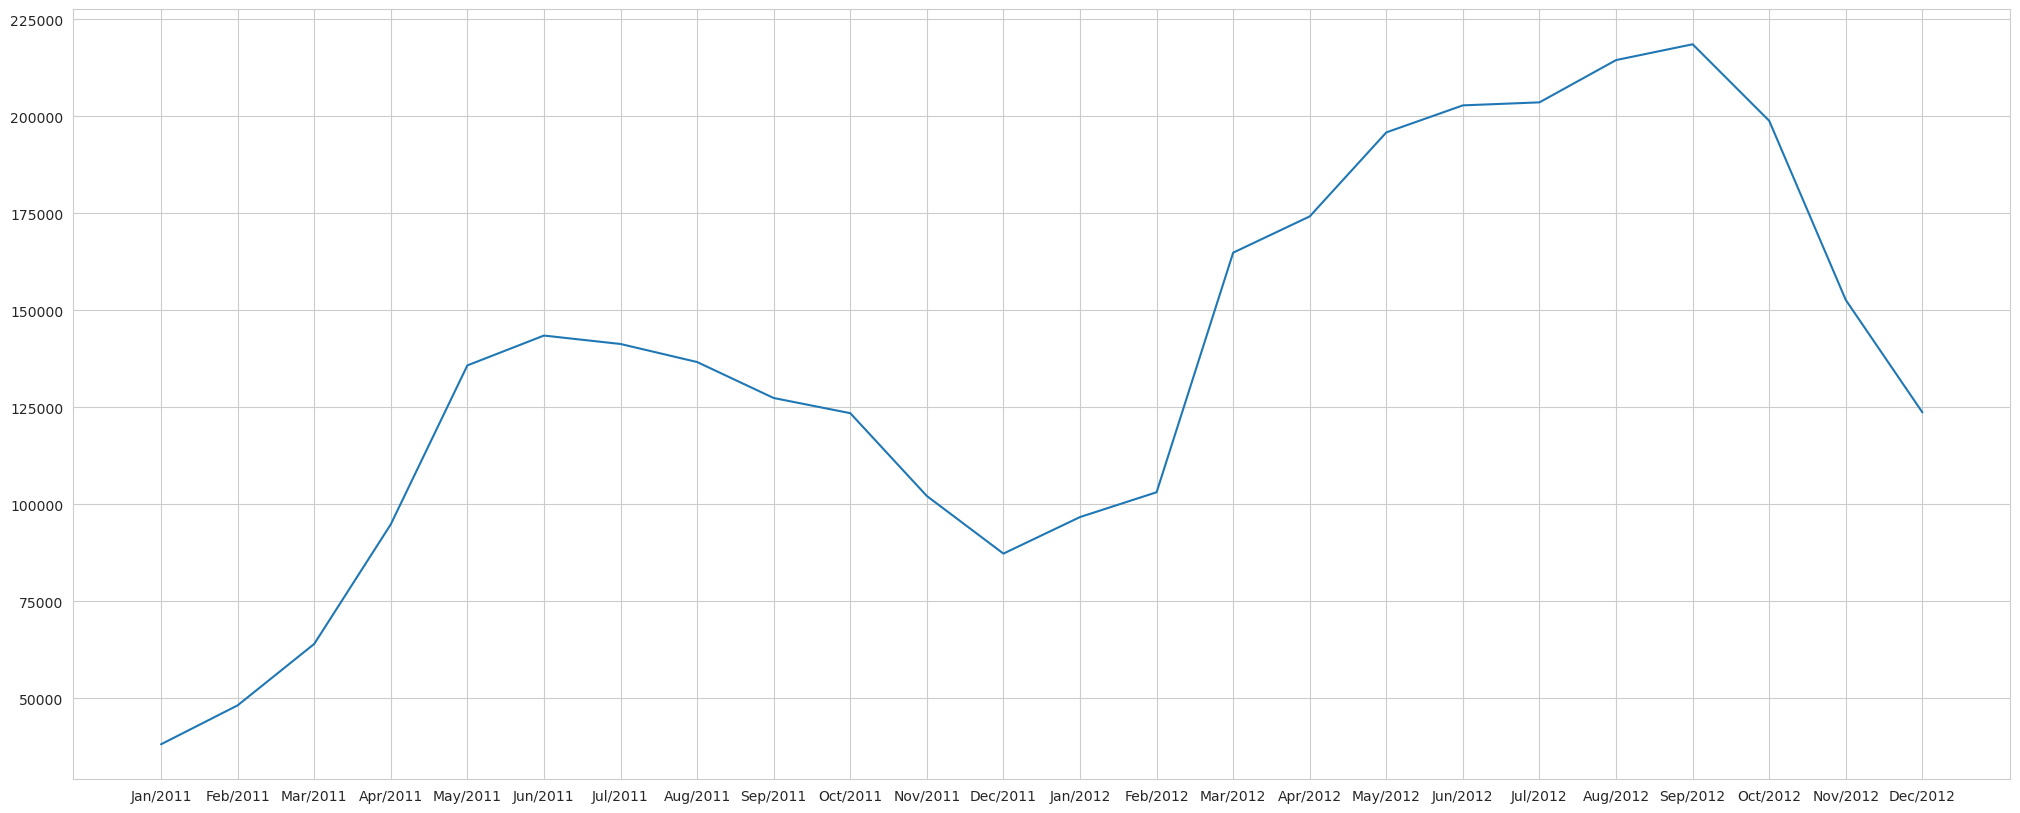

In [197]:
# Melakukan grouping
sharing_bike_trend_df = day_df.groupby(by=["yr", "mnth"])["cnt"].sum().reset_index()

# Mengubah indeks tahun menjadi bentuk sebenarnya
sharing_bike_trend_df["yr"] = sharing_bike_trend_df["yr"].apply(lambda x: 2011 if x == 0 else 2012)

# Mengubah bulan dalam bentuk teks
sharing_bike_trend_df["mnth"] = sharing_bike_trend_df["mnth"].apply(lambda x: calendar.month_abbr[x])

# Membuat kolom baru dari kolom tahun dan bulan
sharing_bike_trend_df["year_month"] = sharing_bike_trend_df["mnth"].astype(str) + "/" + sharing_bike_trend_df[
    "yr"].astype(str)

# Membuang kolom yr dan mnth
sharing_bike_trend_df.drop(columns=["yr", "mnth"], inplace=True)

# Melakukan plotting untuk melihat tren peminjaman sepeda
plt.figure(figsize=(25, 10))
plt.plot(sharing_bike_trend_df["year_month"], sharing_bike_trend_df["cnt"])
plt.title("", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


### Pertanyaan 2: Apakah jumlah peminjam sepeda bertambah pada hari libur nasional atau akhir pekan dibandingkan dengan hari kerja?

### Pertanyaan 3: Bagaimana keadaan cuaca yang lebih disukai oleh pesepeda?

### Pertanyaan 4: Apakah musim panas menjadi musim dengan jumlah peminjam sepeda terbanyak?

### Pertanyaan 5: Apakah jumlah penyewa sepeda yang terdaftar lebih banyak dari penyewa kasual?

### Pertanyaan 6: Apakah sore hari merupakan waktu yang cocok untuk bersepeda?

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2